**ADA Milestone 2: Data collection and descriptive analysis**

In [44]:
#Imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import folium
import warnings
from IPython.display import Image

warnings.simplefilter('ignore')
PATH = './Data'

Some terms definition (cf https://offshoreleaks.icij.org/pages/faq#terms_definition):  
  
- Entity: A company, trust or fund created by an agent.
- Officer: A person or company who plays a role in an offshore entity
- Intermediary: A go-between for someone seeking an offshore corporation and an offshore service provider
- Address: Contact postal address as it appears in the original databases obtained by ICIJ

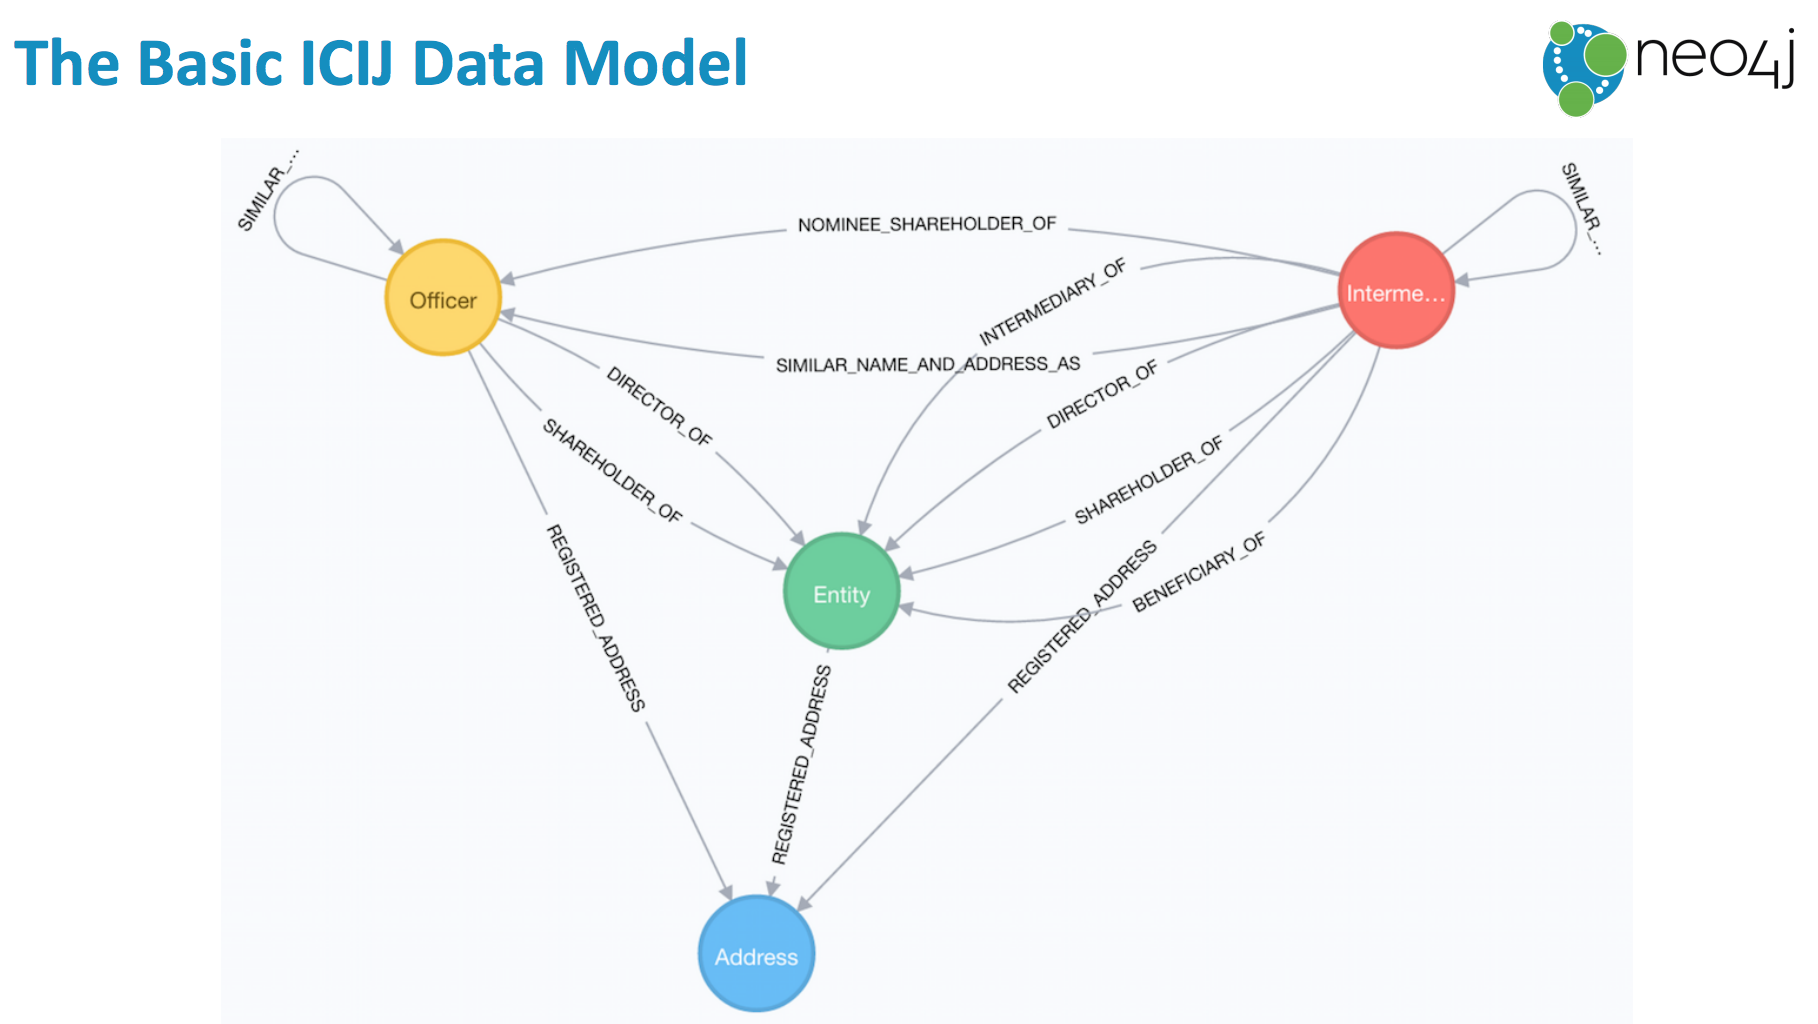

In [45]:
#The Panama Papers: Using open source tools for investigative journalism by Michael Hunger
Image(filename = PATH + "/Schema.png", width=700, height=700)

In [46]:
#Load each csv file into a dataframe
address = pd.read_csv(PATH+'/address.csv')
edges = pd.read_csv(PATH+'/edges.csv')
entity = pd.read_csv(PATH+'/entity.csv')
intermediary = pd.read_csv(PATH+'/intermediary.csv')
officer = pd.read_csv(PATH+'/officer.csv')

Quick inspection of the data reveals that some columns are either empty (note...) or contain redundant/useless information (valid_until, countries vs country_code...). Therefore we shall get rid of them.  
Moreover, we convert dates to the datetime format for further manipulations.  
We also observe that node ids in each dataframe are unique.

In [47]:
#Drop useless columns
address.drop(['name', 'sourceID', 'valid_until', 'note', 'country_codes'], axis=1, inplace=True)
edges.drop(['sourceID', 'valid_until'], axis=1, inplace=True)
officer.drop(['sourceID', 'valid_until', 'note', 'country_codes'], axis=1, inplace=True)
intermediary.drop(['sourceID', 'valid_until', 'note', 'country_codes'], axis=1, inplace=True)
entity.drop(['closed_date', 'company_type', 'service_provider', 'sourceID', 'valid_until', 'note', 'country_codes', 'jurisdiction'], axis=1, inplace=True)

In [48]:
#Convert dates to datetime
entity['incorporation_date'] = pd.to_datetime(entity['incorporation_date'], format='%d-%b-%Y')
entity['inactivation_date'] = pd.to_datetime(entity['inactivation_date'], format='%d-%b-%Y')
entity['struck_off_date'] = pd.to_datetime(entity['struck_off_date'], format='%d-%b-%Y', errors='coerce')

Let's have a quick look at each dataframe

In [49]:
print('Address:',address.size,'entries')
address.head()

280362 entries


,node_id,address,countries
0,14000001,-\t27 ROSEWOOD DRIVE #16-19 SINGAPORE 737920,Singapore
1,14000002,"""Almaly Village"" v.5, Almaty Kazakhstan",Kazakhstan
2,14000003,"""Cantonia"" South Road St Georges Hill Weybridg...",United Kingdom
3,14000004,"""CAY-OS"" NEW ROAD; ST.SAMPSON; GUERNSEY; CHANN...",Guernsey
4,14000005,"""Chirag"" Plot No 652; Mwamba Road; Kizingo; Mo...",Kenya


In [50]:
print('Edges:',edges.size,'entries')
edges.head()

4044612 entries


,START_ID,TYPE,END_ID,link,start_date,end_date
0,10000035,registered_address,14095990,registered address,NaN,NaN
1,10000044,registered_address,14091035,registered address,NaN,NaN
2,10000055,registered_address,14095990,registered address,NaN,NaN
3,10000064,registered_address,14091429,registered address,NaN,NaN
4,10000089,registered_address,14098253,registered address,NaN,NaN


In [74]:
print('Entity:',entity.size,'entries')
entity.head()

Entity: 1922706 entries


,node_id,name,jurisdiction_description,countries,incorporation_date,inactivation_date,struck_off_date,ibcRUC,status
0,10000001,"TIANSHENG INDUSTRY AND TRADING CO., LTD.",Samoa,Hong Kong,2006-03-23,2013-02-18,2013-02-15,25221,Defaulted
1,10000002,"NINGBO SUNRISE ENTERPRISES UNITED CO., LTD.",Samoa,Hong Kong,2006-03-27,2014-02-27,2014-02-15,25249,Defaulted
2,10000003,"HOTFOCUS CO., LTD.",Samoa,Hong Kong,2006-01-10,2012-02-15,2012-02-15,24138,Defaulted
3,10000004,"SKY-BLUE GIFTS & TOYS CO., LTD.",Samoa,Hong Kong,2006-01-06,2009-02-16,2009-02-15,24012,Defaulted
4,10000005,FORTUNEMAKER INVESTMENTS CORPORATION,Samoa,Hong Kong,2006-04-19,2009-05-15,2008-02-15,R25638,Changed agent


In [52]:
print('Intermediary:',intermediary.size,'entries')
intermediary.head()

56440 entries


,node_id,name,countries,status
0,11000001,"MICHAEL PAPAGEORGE, MR.",South Africa,ACTIVE
1,11000002,CORFIDUCIA ANSTALT,Liechtenstein,ACTIVE
2,11000003,"DAVID, RONALD",Monaco,SUSPENDED
3,11000004,"DE BOUTSELIS, JEAN-PIERRE",Belgium,SUSPENDED
4,11000005,THE LEVANT LAWYERS (TLL),Lebanon,ACTIVE


In [53]:
print('Officer',officer.size,'entries')
officer.head()

715206 entries


,node_id,name,countries
0,12000001,KIM SOO IN,South Korea
1,12000002,Tian Yuan,China
2,12000003,GREGORY JOHN SOLOMON,Australia
3,12000004,MATSUDA MASUMI,Japan
4,12000005,HO THUY NGA,Viet Nam


Let's obtain key figures about the Panama Papers

We start with entities

Top 10 Number of offshore entities per jurisdiction

In [109]:
def plot_counts(title, data):
    plt.figure(figsize=(8,4))
    data.plot(kind='bar')
    plt.title(title)
    plt.ylabel("Count")
    plt.xticks(rotation=85)
    plt.plot()

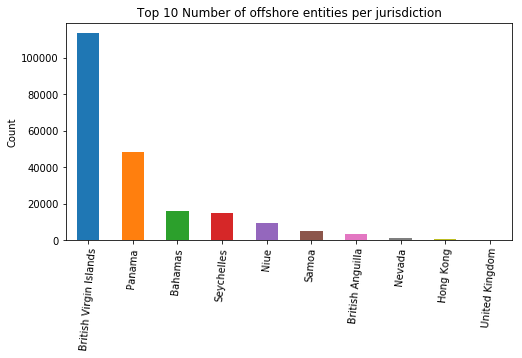

In [110]:
juris = entity['jurisdiction_description'].value_counts()[:10]
plot_counts("Top 10 Number of offshore entities per jurisdiction", juris)

Top 15 Number of offshore entities per country

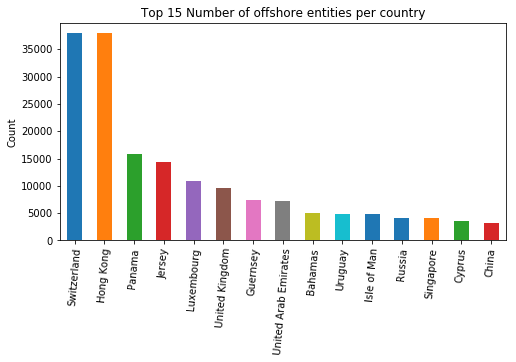

In [111]:
countries = entity['countries'].value_counts()[:15]
plot_counts("Top 15 Number of offshore entities per country", countries)

Number of incorporated offshore companies per year

[]

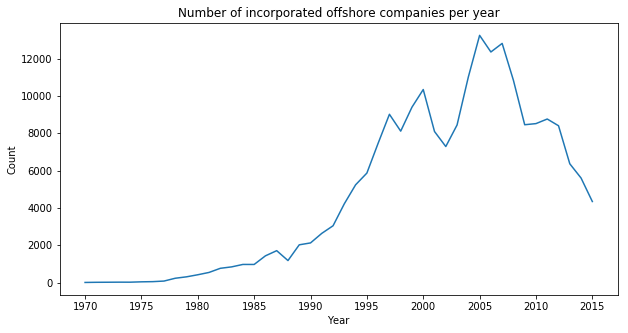

In [56]:
dates = entity['incorporation_date'].dt.year
incorp = dates[dates >= 1970].value_counts().sort_index()

plt.figure(figsize=(10,5))
incorp.plot(kind='line')
plt.title('Number of incorporated offshore companies per year')
plt.xlabel('Year')
plt.ylabel('Count')
plt.xticks(range(1970, 2020, 5))
plt.plot()

Number of incorporated offshore companies per year per jurisdiction

[]

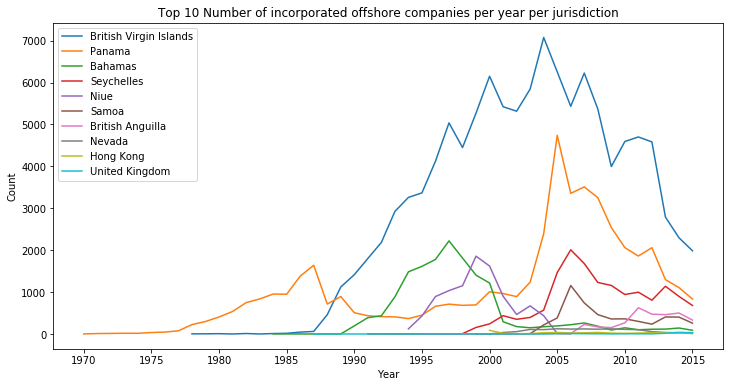

In [72]:
juris_dates = pd.concat([entity['jurisdiction_description'], dates], axis=1)
juris_dates = juris_dates[(juris_dates['incorporation_date'] >= 1970) & (juris_dates['jurisdiction_description'].isin(juris.index))]
juris_dates = juris_dates.groupby(['jurisdiction_description','incorporation_date']).size().reset_index()
juris_dates.columns = ['jurisdiction_description', 'incorporation_date', 'count']

plt.figure(figsize=(12,6))
for j in juris.index:
    incor_juris = juris_dates[juris_dates['jurisdiction_description']==j]
    plt.plot(incor_juris['incorporation_date'], incor_juris['count'])  
plt.title('Top 10 Number of incorporated offshore companies per year per jurisdiction')
plt.xlabel('Year')
plt.ylabel('Count')
plt.legend(juris.index)
plt.xticks(range(1970, 2020, 5))
plt.plot()

Number of incorporated offshore companies per year per country

[]

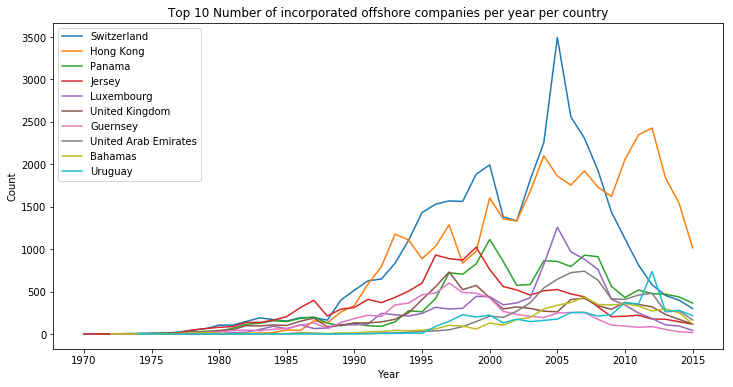

In [75]:
country_dates = pd.concat([entity['countries'], dates], axis=1)
country_dates = country_dates[(country_dates['incorporation_date'] >= 1970) & (country_dates['countries'].isin(countries.index[:10]))]
country_dates = country_dates.groupby(['countries','incorporation_date']).size().reset_index()
country_dates.columns = ['countries', 'incorporation_date', 'count']

plt.figure(figsize=(12,6))
for c in countries.index[:10]:
    incor_country = country_dates[country_dates['countries']==c]
    plt.plot(incor_country['incorporation_date'], incor_country['count'])  
plt.title('Top 10 Number of incorporated offshore companies per year per country')
plt.xlabel('Year')
plt.ylabel('Count')
plt.legend(countries.index[:10])
plt.xticks(range(1970, 2020, 5))
plt.plot()

We continue with intermediaries

Top 15 Number of intermediaries per country

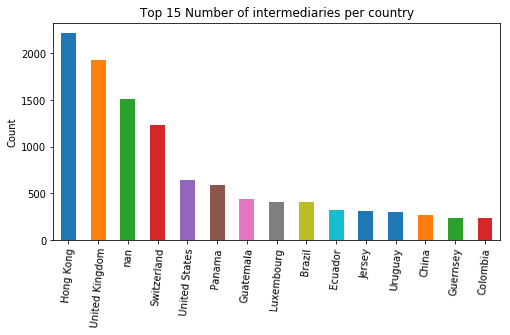

In [112]:
#First we need to explode the countries column since one intermediary may have multiple countries
inter_countries = intermediary['countries'].astype(str).apply(lambda s: s.split(';'))
inter_countries = inter_countries.apply(pd.Series).stack().reset_index(drop=True)
inter_countries = inter_countries.value_counts()[:15]

plot_counts("Top 15 Number of intermediaries per country", inter_countries)

Distribution of intermediaries' status

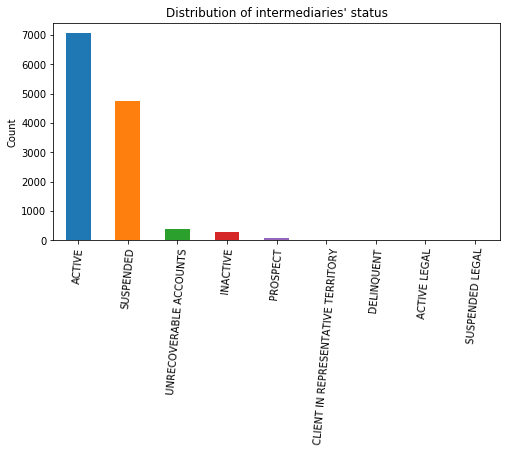

In [113]:
inter_status = intermediary['status'].value_counts()
plot_counts("Distribution of intermediaries' status", inter_status)